# <font color='red'> Project 2

### Project Description:
- Use the same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.You can use the same preprocessing steps as it was used in Project 1. 
- Apply recommended changes if there is any. 

### Regression Task:
- Apply any two models with bagging and any two models with pasting. 
- Apply any two models with AdaBoost boosting. 
- Apply gradient boosting. 
- Apply PCA on data and then apply all the models in project 1 again on the post PCA data. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result from project 1, prepare a similar table for all the models after PCA and compare. Does PCA help in getting better results? 
- Apply deep learning models (MLP) covered in class. 

### Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting. 
- Apply any two models with bagging and any two models with pasting. 
- Apply any two models with AdaBoost boosting. 
- Apply one model with gradient boosting. 
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class. 
- In all the classification tasks, consider the evaluation function you used in Project 1. 

### Deliverables:
- Use markdown to provide inline comments for this project. 
- Use markdown to create final report for this project. 
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs. 
- Visualization encouraged. 
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convention:
    - ``Project2_Regression_GroupXX_Lastname1_Lastname2.ipynb``
    - ``Project2_Classification_GroupXX_Lastname1_Lastname2.ipynb``
  
  then zip these two files and the csv files of the two datasets into one file and submit. 
- If you are submitting a single file, then please follow below naming convention:
    - ``Project2_Both_GroupXX_Lastname1_Lastname2.ipynb``
    
    then zip this file and the csv files of the two datasets into one file and submit. 

# PROJECT 2 : REGRESSION
<h4>Rhea D'Souza, Rishabh Bhatia

# Dataset: Life Expectancy (WHO)
Statistical Analysis on factors influencing Life Expectancy

# Feature Information

The dataset consists of 22 columns of which 20 are predictor variables and 2938 rows.

<h3>Columns</h3>
   1. <b>Country</b>: Country
   <br>2. <b>Year</b>: Year
   <br>3. <b>Status</b>: Developed or Developing status
   <br>4. <b>Life expectancy</b>: Life Expectancy in age
   <br>5. <b>Adult Mortality</b>: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
   <br>6. <b>infant deaths</b>: Number of Infant Deaths per 1000 population
   <br>7. <b>Alcohol</b>: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
   <br>8. <b>percentage expenditure</b>: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
   <br>9. <b>Hepatitis B</b>: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
   <br>10. <b>Measles</b>: Measles - number of reported cases per 1000 population
   <br>11. <b>BMI</b>: Average Body Mass Index of entire population
   <br>12. <b>under-five deaths</b>: Number of under-five deaths per 1000 population
   <br>13. <b>Polio</b>: Polio (Pol3) immunization coverage among 1-year-olds (%)
   <br>14. <b>Total expenditure</b>: General government expenditure on health as a percentage of total government expenditure (%)
   <br>15. <b>Diphtheria</b>: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
   <br>16. <b>HIV/AIDS</b>: Deaths per 1 000 live births HIV/AIDS (0-4 years)
   <br>17. <b>GDP</b>: Gross Domestic Product per capita (in USD)
   <br>18. <b>Population</b>: Population of the country
   <br>19. <b>thinness 1-19 years</b>: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
   <br>20. <b>thinness 5-9 years</b>: Prevalence of thinness among children for Age 5 to 9(%)
   <br>21. <b>Income composition of resources</b>: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
   <br>22. <b>Schooling</b>: Number of years of Schooling(years)
   
   <h3>Dataset Source</h3>
   https://www.kaggle.com/kumarajarshi/life-expectancy-who

# Data Preprocessing

<h2>1. Library Imports</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

<h2>2. Reading the data into a pandas dataframe</h2>

In [2]:
lifexp_df = pd.read_csv("Life Expectancy Data.csv")

lifexp_df.head() #displays the top 5 rows of the dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#Displays the number of rows and columns in the dataset
print("The dataset has {} rows" .format(lifexp_df.shape[0]))
print("The dataset has {} columns" .format(lifexp_df.shape[1]))
print(lifexp_df.shape)

The dataset has 2938 rows
The dataset has 22 columns
(2938, 22)


In [4]:
lifexp_df.dtypes #displays the datatypes of all 22 columns

#But processed dataset should finally have only numerical values. Notice that the dataset before preprocessing steps has
#object datatype as well which we need to convert to numerical

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [5]:
lifexp_df.info() #Diplays information about the dataset including non-null values, datatype, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<h2>3. Data Transformation</h2>

In [6]:
#Check columns in the dataset. We have 22 columns in total
lifexp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Notice that some of these columns have spaces before and within the column name. Using standardized column naming

In [7]:
#Use the rename function to remove the leading, trailing and between spaces in the column names
lifexp_df.rename(columns={'Life expectancy ':'Life_Expectancy', 'Adult Mortality':'Adult_Mortality','infant deaths':'Infant_Deaths','percentage expenditure':'Percentage_Exp', 'Hepatitis B':'Hepatitis_B', 'Measles ':'Measles', ' BMI ':'BMI',
                          'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_Exp','Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
                          ' thinness  1-19 years':'thinness_1_to_19', ' thinness 5-9 years':'thinness_5_to_9', 'Income composition of resources':'Income_Composition'}, inplace=True)

In [8]:
lifexp_df.head() #See the new updated column names

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<h3>Checking for NULL values in the dataset

In [9]:
#Counts the number of null values in each column/feature of the dataset
lifexp_df.isna().sum()

Country                 0
Year                    0
Status                  0
Life_Expectancy        10
Adult_Mortality        10
Infant_Deaths           0
Alcohol               194
Percentage_Exp          0
Hepatitis_B           553
Measles                 0
BMI                    34
under_five_deaths       0
Polio                  19
Total_Exp             226
Diphtheria             19
HIV/AIDS                0
GDP                   448
Population            652
thinness_1_to_19       34
thinness_5_to_9        34
Income_Composition    167
Schooling             163
dtype: int64

In [10]:
#Percentage of null values
lifexp_df.isna().mean().round(4) * 100

Country                0.00
Year                   0.00
Status                 0.00
Life_Expectancy        0.34
Adult_Mortality        0.34
Infant_Deaths          0.00
Alcohol                6.60
Percentage_Exp         0.00
Hepatitis_B           18.82
Measles                0.00
BMI                    1.16
under_five_deaths      0.00
Polio                  0.65
Total_Exp              7.69
Diphtheria             0.65
HIV/AIDS               0.00
GDP                   15.25
Population            22.19
thinness_1_to_19       1.16
thinness_5_to_9        1.16
Income_Composition     5.68
Schooling              5.55
dtype: float64

The dataset satisfies the condition of having enough NULLS to work with. However, there is a high percentage of empty cells for the columns Population, Hepatitis_B and GDP. However, these are important columns and cannot be dropped completely. As they are numerical, we will impute values into these fields.

There are blank cells. Let's first fill the blank cells with NaN

In [11]:
lifexp_df.replace(" ", np.NaN, inplace = True) #Relaplcing blank cells with the value NaN

<b>Imputing the mean of the particular columns respectively into where there were NaN values in each column originally

In [12]:
lifexp_df['Life_Expectancy'] = lifexp_df['Life_Expectancy'].fillna(lifexp_df['Life_Expectancy'].mean())
lifexp_df['Adult_Mortality'] = lifexp_df['Adult_Mortality'].fillna(lifexp_df['Adult_Mortality'].mean())
lifexp_df['Alcohol'] = lifexp_df['Alcohol'].fillna(lifexp_df['Alcohol'].mean())
lifexp_df['Hepatitis_B'] = lifexp_df['Hepatitis_B'].fillna(lifexp_df['Hepatitis_B'].mean())
lifexp_df['BMI'] = lifexp_df['BMI'].fillna(lifexp_df['BMI'].mean())
lifexp_df['Total_Exp'] = lifexp_df['Total_Exp'].fillna(lifexp_df['Total_Exp'].mean())
lifexp_df['Polio'] = lifexp_df['Polio'].fillna(lifexp_df['Polio'].mean())
lifexp_df['Diphtheria'] = lifexp_df['Diphtheria'].fillna(lifexp_df['Diphtheria'].mean())
lifexp_df['GDP'] = lifexp_df['GDP'].fillna(lifexp_df['GDP'].mean())
lifexp_df['Population'] = lifexp_df['Population'].fillna(lifexp_df['Population'].mean())
lifexp_df['thinness_1_to_19'] = lifexp_df['thinness_1_to_19'].fillna(lifexp_df['thinness_1_to_19'].mean())
lifexp_df['thinness_5_to_9'] = lifexp_df['thinness_5_to_9'].fillna(lifexp_df['thinness_5_to_9'].mean())
lifexp_df['Income_Composition'] = lifexp_df['Income_Composition'].fillna(lifexp_df['Income_Composition'].mean())
lifexp_df['Schooling'] = lifexp_df['Schooling'].fillna(lifexp_df['Schooling'].mean())

In [13]:
lifexp_df.isna().sum() #Now none of the columns have NaN values

Country               0
Year                  0
Status                0
Life_Expectancy       0
Adult_Mortality       0
Infant_Deaths         0
Alcohol               0
Percentage_Exp        0
Hepatitis_B           0
Measles               0
BMI                   0
under_five_deaths     0
Polio                 0
Total_Exp             0
Diphtheria            0
HIV/AIDS              0
GDP                   0
Population            0
thinness_1_to_19      0
thinness_5_to_9       0
Income_Composition    0
Schooling             0
dtype: int64

In [14]:
lifexp_df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


The 'Status' column has datatype as object. Using the unique function, we can see it's unique categorical values

In [15]:
#To see unique categorical values nominal
lifexp_df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

<AxesSubplot:xlabel='Status'>

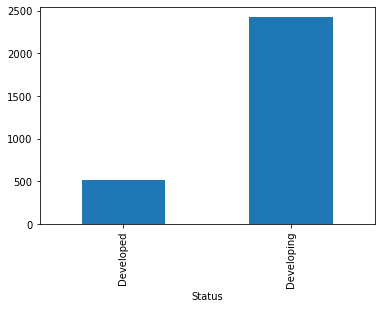

In [16]:
#Counting the number of developed and developing countries in the dataset to see which has more instances
#The one with more instances is given label 1 and lesser instances is given label 0

lifexp_df.groupby('Status').count()['Life_Expectancy'].plot(kind = 'bar')

In [17]:
#We can see that the number of Developing countries is more than the Developed ones
#Since the datatype of 'Status' column is object, we convert it to integer/numerical values Developing=1 and Developed=0
lifexp_df['Status']=lifexp_df['Status'].map({'Developing':1,'Developed':0}).astype(int)

Countries is also categorical. But as each acts as a unique category and since we will eventually not need countries in our dataset (they cannot be converted to numerical), we will not be converting it into a onehot vector. This column is eventually dropped

# EXPLORATORY DATA ANALYSIS

<b>Importing visualization and plotting libraries</b>

In [18]:
import seaborn as sb
from pandas.plotting import scatter_matrix
%matplotlib inline

array([[<AxesSubplot:xlabel='Adult_Mortality', ylabel='Adult_Mortality'>,
        <AxesSubplot:xlabel='Infant_Deaths', ylabel='Adult_Mortality'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Adult_Mortality'>,
        <AxesSubplot:xlabel='Percentage_Exp', ylabel='Adult_Mortality'>,
        <AxesSubplot:xlabel='Hepatitis_B', ylabel='Adult_Mortality'>],
       [<AxesSubplot:xlabel='Adult_Mortality', ylabel='Infant_Deaths'>,
        <AxesSubplot:xlabel='Infant_Deaths', ylabel='Infant_Deaths'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Infant_Deaths'>,
        <AxesSubplot:xlabel='Percentage_Exp', ylabel='Infant_Deaths'>,
        <AxesSubplot:xlabel='Hepatitis_B', ylabel='Infant_Deaths'>],
       [<AxesSubplot:xlabel='Adult_Mortality', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Infant_Deaths', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Percentage_Exp', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Hepatitis_B', yl

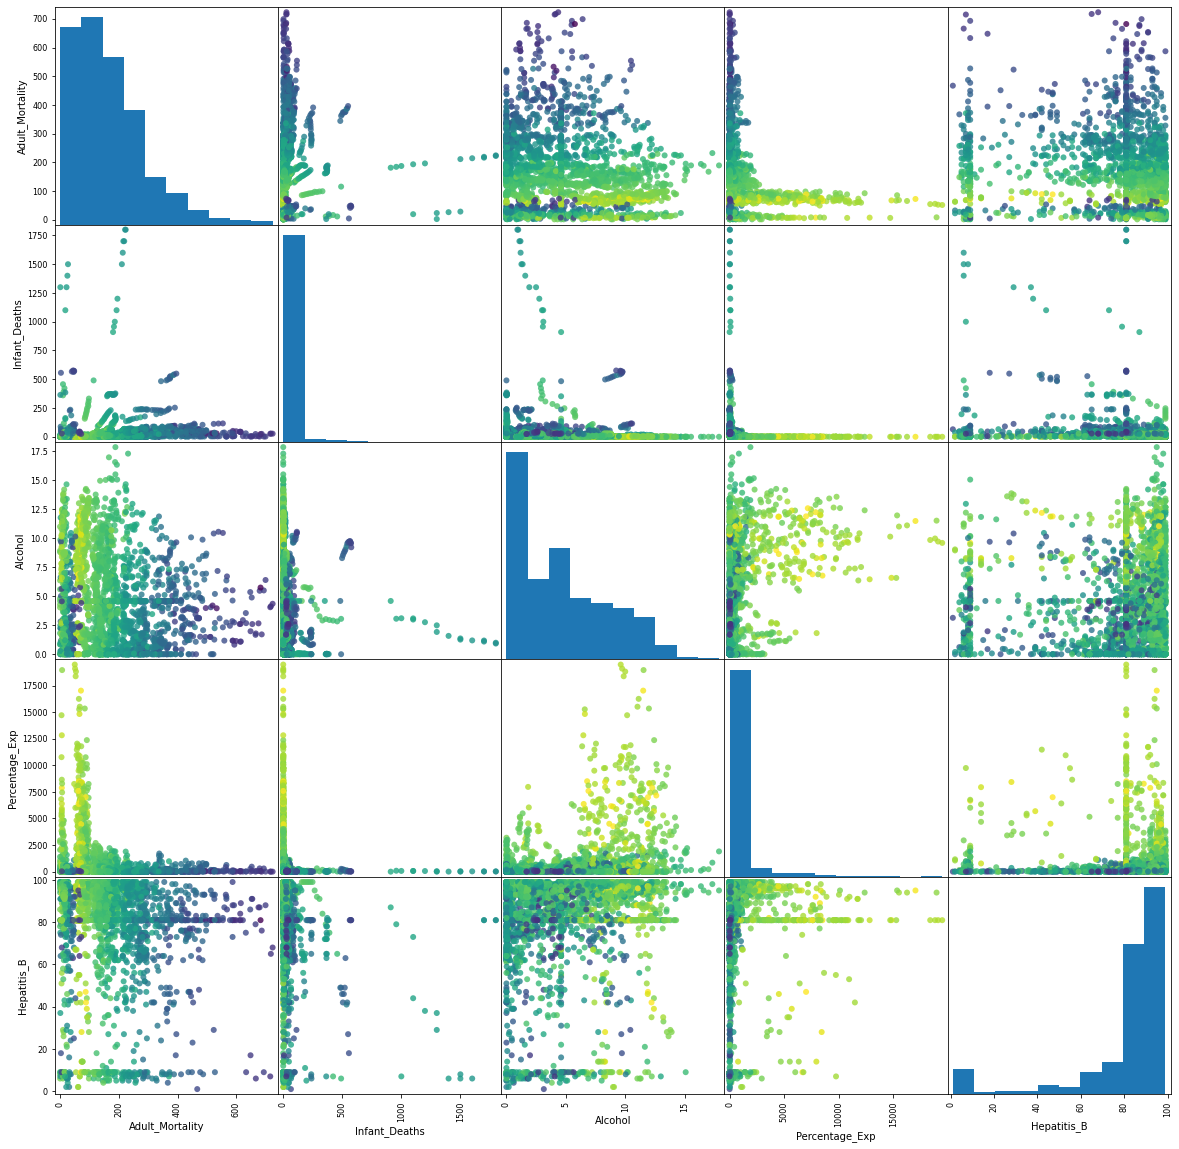

In [19]:
#Visualizing a scatter matrix of a column subset
cols = lifexp_df.columns[4:9]
y = lifexp_df['Life_Expectancy']
scatter_matrix(lifexp_df[cols], figsize = (20,20), c = y, alpha = 0.8, marker = 'O')

The data is not normally distributed. Hence we cannot use the Standard Scaler later for feature scaling

<b>Some important questions to consider in this dataset</b>
1. Visualize adult and infant mortality rates for top 10 counties with lowest life expectancy
2. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol
3. What is the impact of schooling on the lifespan of humans?
4. Do densely populated countries tend to have lower life expectancy?

<b>Visualizing the top 10 countries with lowest life expectancy</b>

In [20]:
low_life = lifexp_df.groupby('Country').mean().nsmallest(10, ['Life_Expectancy']).reset_index()
low_life

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
0,Sierra Leone,2007.5,1,46.11250,357.8125,27.5625,3.245179,29.105579,82.348952,673.8750,...,71.7500,9.013012,72.1250,1.51875,271.505561,3.336265e+06,7.68125,7.10000,0.361812,8.231250
1,Central African Republic,2007.5,1,48.51250,333.0625,16.5000,1.442054,40.905543,64.154009,699.4375,...,41.3125,4.158012,42.4375,8.98125,363.055905,2.016546e+06,7.10625,7.08750,0.335500,6.237500
2,Lesotho,2007.5,1,48.78125,550.0625,4.5000,2.243929,82.118913,74.676336,266.6875,...,67.9375,7.503012,79.4375,22.96875,794.523010,1.200528e+06,7.18750,7.06875,0.456813,10.656250
3,Angola,2007.5,1,49.01875,328.5625,83.7500,5.669554,102.100268,74.911452,3561.3125,...,46.1250,4.045512,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.043750
4,Malawi,2007.5,1,49.89375,424.4375,37.1250,1.149554,25.849706,88.492558,7559.4375,...,89.0625,6.613637,83.6250,16.68125,237.504042,6.700263e+06,7.11875,6.98750,0.410625,10.231250
5,Chad,2007.5,1,50.38750,227.7500,44.8750,0.673304,32.277320,55.407731,4687.7500,...,32.8750,4.476762,26.8125,4.33750,484.791694,4.114092e+06,7.14375,7.04375,0.316625,6.087500
6,Côte d'Ivoire,2007.5,1,50.38750,417.3125,61.5000,2.947679,0.000000,64.996279,1708.2500,...,65.9375,5.736762,68.9375,4.68750,7483.158469,1.275338e+07,6.73750,6.69375,0.627551,11.992793
7,Zimbabwe,2007.5,1,50.48750,462.3750,26.5625,4.489554,20.364271,70.562500,923.0000,...,75.6250,6.144887,75.1875,23.26250,410.980194,8.021343e+06,7.01250,6.98750,0.439125,9.825000
8,Swaziland,2007.5,1,51.32500,339.0000,2.6250,4.472054,278.099713,76.000000,49.1250,...,89.0000,7.223012,83.7500,32.94375,2165.090838,4.573031e+05,6.47500,6.63125,0.515688,10.350000
9,Nigeria,2007.5,1,51.35625,248.5000,535.6875,8.393929,85.444275,54.793894,51653.9375,...,41.3125,3.849887,39.3125,4.83125,1360.139877,7.087700e+07,10.41875,10.36875,0.367375,9.000000


<b>Visualize adult and infant mortality rates for top 10 counties with lowest life expectancy</b>

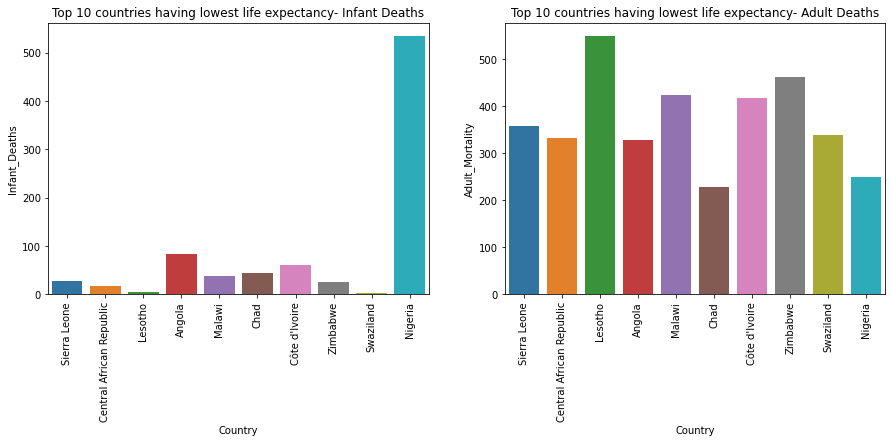

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
infant = sb.barplot(data = low_life, x = low_life.Country, y = low_life['Infant_Deaths'])
infant.set_title("Top 10 countries having lowest life expectancy- Infant Deaths")
infant.set_xticklabels(infant.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
adult = sb.barplot(data = low_life, x = low_life.Country, y = low_life['Adult_Mortality'])
adult.set_title("Top 10 countries having lowest life expectancy- Adult Deaths")
adult.set_xticklabels(adult.get_xticklabels(), rotation = 90)


plt.show()

We can see that among the top 10 countries with the lowest mean life expectancy, the adult mortality is highest in Lesotho and infant mortality is highest in Nigeria. Althought the average life expectancy is low for these countries, it's nice to see that the average infant deaths for countries other than Nigeria is pretty low.

<b>What is the impact of schooling on the lifespan of humans?<b>

In [22]:
#Top 10 Countries with lowest schooling and their lifespan

low_school = lifexp_df.groupby('Country').mean().nsmallest(10, ['Schooling']).reset_index()
low_school

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
0,Marshall Islands,2013.0,1,69.224932,164.796448,0.0000,0.010000,871.878317,8.000000,0.0000,...,79.000000,17.240000,79.000000,0.10000,3617.752354,1.275338e+07,0.100000,0.100000,0.627551,0.00000
1,Tuvalu,2013.0,1,69.224932,164.796448,0.0000,0.010000,78.281203,9.000000,0.0000,...,9.000000,16.610000,9.000000,0.10000,3542.135890,1.819000e+03,0.200000,0.100000,0.627551,0.00000
2,South Sudan,2007.5,1,53.875000,346.312500,27.7500,4.602861,8.241077,77.819182,315.7500,...,70.503255,5.332904,71.285307,3.69375,4287.696050,3.750827e+06,4.839704,4.870317,0.131688,1.53125
3,Niger,2007.5,1,56.981250,232.437500,52.8125,0.373304,19.099369,72.029009,15467.1250,...,52.937500,6.537387,52.312500,1.16250,259.782441,1.124072e+07,9.025000,8.912500,0.298125,4.01875
4,Djibouti,2007.5,1,60.756250,274.687500,1.4375,1.003929,98.838448,79.286452,113.8750,...,74.875000,6.999887,75.125000,3.28125,897.999871,6.341162e+05,5.843750,5.700000,0.418437,4.75000
5,Eritrea,2007.5,1,60.687500,308.625000,6.3125,0.857679,6.436069,85.742558,175.0000,...,87.812500,3.623012,82.250000,1.21250,2065.336135,4.742283e+06,8.081250,8.018750,0.255312,4.92500
6,Burkina Faso,2007.5,1,55.643750,252.500000,44.7500,4.263929,52.045581,81.040173,5091.7500,...,69.000000,6.031762,77.312500,1.83750,410.372034,6.143695e+06,7.418750,6.981250,0.229688,5.40625
7,Chad,2007.5,1,50.387500,227.750000,44.8750,0.673304,32.277320,55.407731,4687.7500,...,32.875000,4.476762,26.812500,4.33750,484.791694,4.114092e+06,7.143750,7.043750,0.316625,6.08750
8,Central African Republic,2007.5,1,48.512500,333.062500,16.5000,1.442054,40.905543,64.154009,699.4375,...,41.312500,4.158012,42.437500,8.98125,363.055905,2.016546e+06,7.106250,7.087500,0.335500,6.23750
9,Sudan,2007.5,1,61.825000,240.312500,64.6250,1.654554,97.698443,75.043894,3108.0000,...,72.250000,5.710512,72.375000,0.25000,1192.797953,1.804652e+07,4.839704,4.870317,0.441000,6.37500


In [23]:
#Top 10 Countries with highest schooling and their lifespan

high_school = lifexp_df.groupby('Country').mean().nlargest(10, ['Schooling']).reset_index()
high_school

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
0,Australia,2007.5,0,81.81250,63.1875,1.00,9.808304,5332.226473,92.621279,103.9375,...,86.7500,8.655512,86.8750,0.1,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.03750
1,New Zealand,2007.5,0,81.33750,71.5000,0.00,9.166250,2922.147780,70.187500,94.9375,...,89.1250,8.692387,70.6250,0.1,14775.554807,1.275338e+07,0.31250,0.30000,0.891188,18.86875
2,Iceland,2007.5,0,82.44375,49.3750,0.00,7.287054,4991.595308,80.940461,0.0000,...,89.7500,8.383012,89.7500,0.1,30159.502908,1.861776e+05,0.95625,0.90000,0.885312,18.15625
3,Ireland,2007.5,0,80.15000,72.4375,0.00,12.150804,4867.312605,83.150288,174.5000,...,86.1250,7.616762,86.1250,0.1,33835.272005,3.599795e+06,0.30000,0.21875,0.891500,17.65625
4,Norway,2007.5,0,81.79375,66.2500,0.00,6.234375,4658.813918,80.940461,6.3125,...,93.0625,8.889262,87.9375,0.1,27434.946928,2.614432e+06,0.76250,0.70000,0.931437,17.46875
5,Finland,2007.5,1,80.71250,68.8750,0.00,9.243304,2889.315470,80.940461,2.8125,...,97.1875,8.446762,98.2500,0.1,25268.649758,3.493082e+06,0.90000,0.80625,0.872937,17.29375
6,Denmark,2007.5,0,79.25625,66.0625,0.00,10.326429,5313.335794,80.940461,15.7500,...,88.0000,7.704887,88.0000,0.1,33067.407916,4.260081e+06,1.16250,0.93750,0.899875,17.19375
7,Netherlands,2007.5,0,81.13125,61.6250,1.00,8.581429,3805.687048,70.709067,251.9375,...,96.8125,7.066137,96.8125,0.1,34964.719797,9.775704e+06,1.02500,0.96250,0.899750,17.05625
8,Belgium,2007.5,0,80.68125,70.1875,0.25,10.640179,2392.432657,74.500000,81.5625,...,97.7500,5.960512,97.3125,0.1,16915.306000,2.884043e+06,0.86250,0.85625,0.877750,16.78750
9,Germany,2007.5,0,81.17500,71.2500,2.50,11.189554,3900.890261,77.437500,1497.1875,...,94.8125,4.189887,89.8750,0.1,24337.749100,3.875735e+07,1.11875,1.10625,0.894500,16.60000


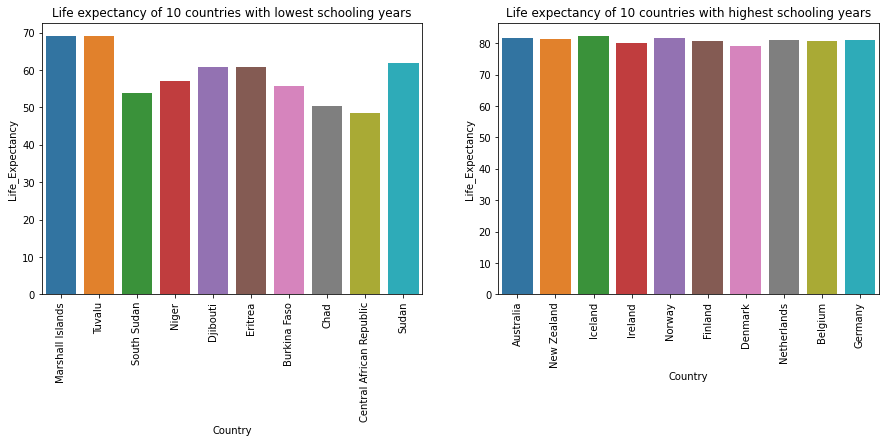

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
school_low = sb.barplot(data = low_school, x = low_school.Country, y = low_school['Life_Expectancy'])
school_low.set_title("Life expectancy of 10 countries with lowest schooling years")
school_low.set_xticklabels(school_low.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
school_high = sb.barplot(data = high_school, x = high_school.Country, y = high_school['Life_Expectancy'])
school_high.set_title("Life expectancy of 10 countries with highest schooling years")
school_high.set_xticklabels(school_high.get_xticklabels(), rotation = 90)


plt.show()

In [25]:
print(low_school['Life_Expectancy'].mean()) #Avg life expectancy for 10 lowest schooling years countries
print(high_school['Life_Expectancy'].mean()) #Avg life expectancy for 10 highest schooling years countries

58.71186133879784
81.049375


From the bar plots above and by taking the mean, we can infer that the average Life Expectancy is more for the countries that have many years of schooling as compared to those that have very few schooling years

<b>Do densely populated countries tend to have lower life expectancy?</b>

In [26]:
#Top 10 Countries with lowest and highest populations

low_pop = lifexp_df.groupby('Country').mean().nsmallest(10, ['Population']).reset_index()
high_pop = lifexp_df.groupby('Country').mean().nlargest(10, ['Population']).reset_index()

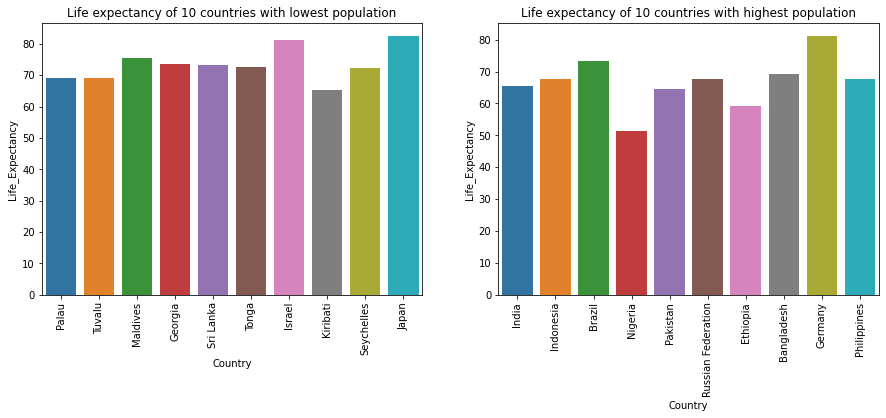

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
pop_low = sb.barplot(data = low_pop, x = low_pop.Country, y = low_pop['Life_Expectancy'])
pop_low.set_title("Life expectancy of 10 countries with lowest population")
pop_low.set_xticklabels(pop_low.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
pop_high = sb.barplot(data = high_pop, x = high_pop.Country, y = high_pop['Life_Expectancy'])
pop_high.set_title("Life expectancy of 10 countries with highest population")
pop_high.set_xticklabels(pop_high.get_xticklabels(), rotation = 90)


plt.show()

Except for Nigeria, the graphs don't show much of a difference in the life expectancy for countries which have the lowest and highest populations. Nigeria has quite a low life expectancy of 50. Let's see the actual averages

In [28]:
print(low_pop['Life_Expectancy'].mean()) #Avg life expectancy for 10  low population countries
print(high_pop['Life_Expectancy'].mean()) #Avg life expectancy for 10  high populationcountries

#Again, not much difference there

73.47873633879782
66.71374999999998


<h3>Dropping unwanted columns</h3>
We drop the column 'Country' as it will no longer be needed for running the models. There are too many country names, hence high cardinality and we cannot create one hot vector for this column. We cannot convert Country column to numerical datatype

In [29]:
lifexp_df.drop('Country', axis = 1, inplace = True)

<h3>Identifying Outliers</h3>
Outliers can skew the data and manipulate the final result. Hence, we check for outliers. However, we will not remove outliers for the sake of the data being accurate. For example, it is possible that a country may have an extremely high population, but that does not mean we disconsider and remove it from our dataset

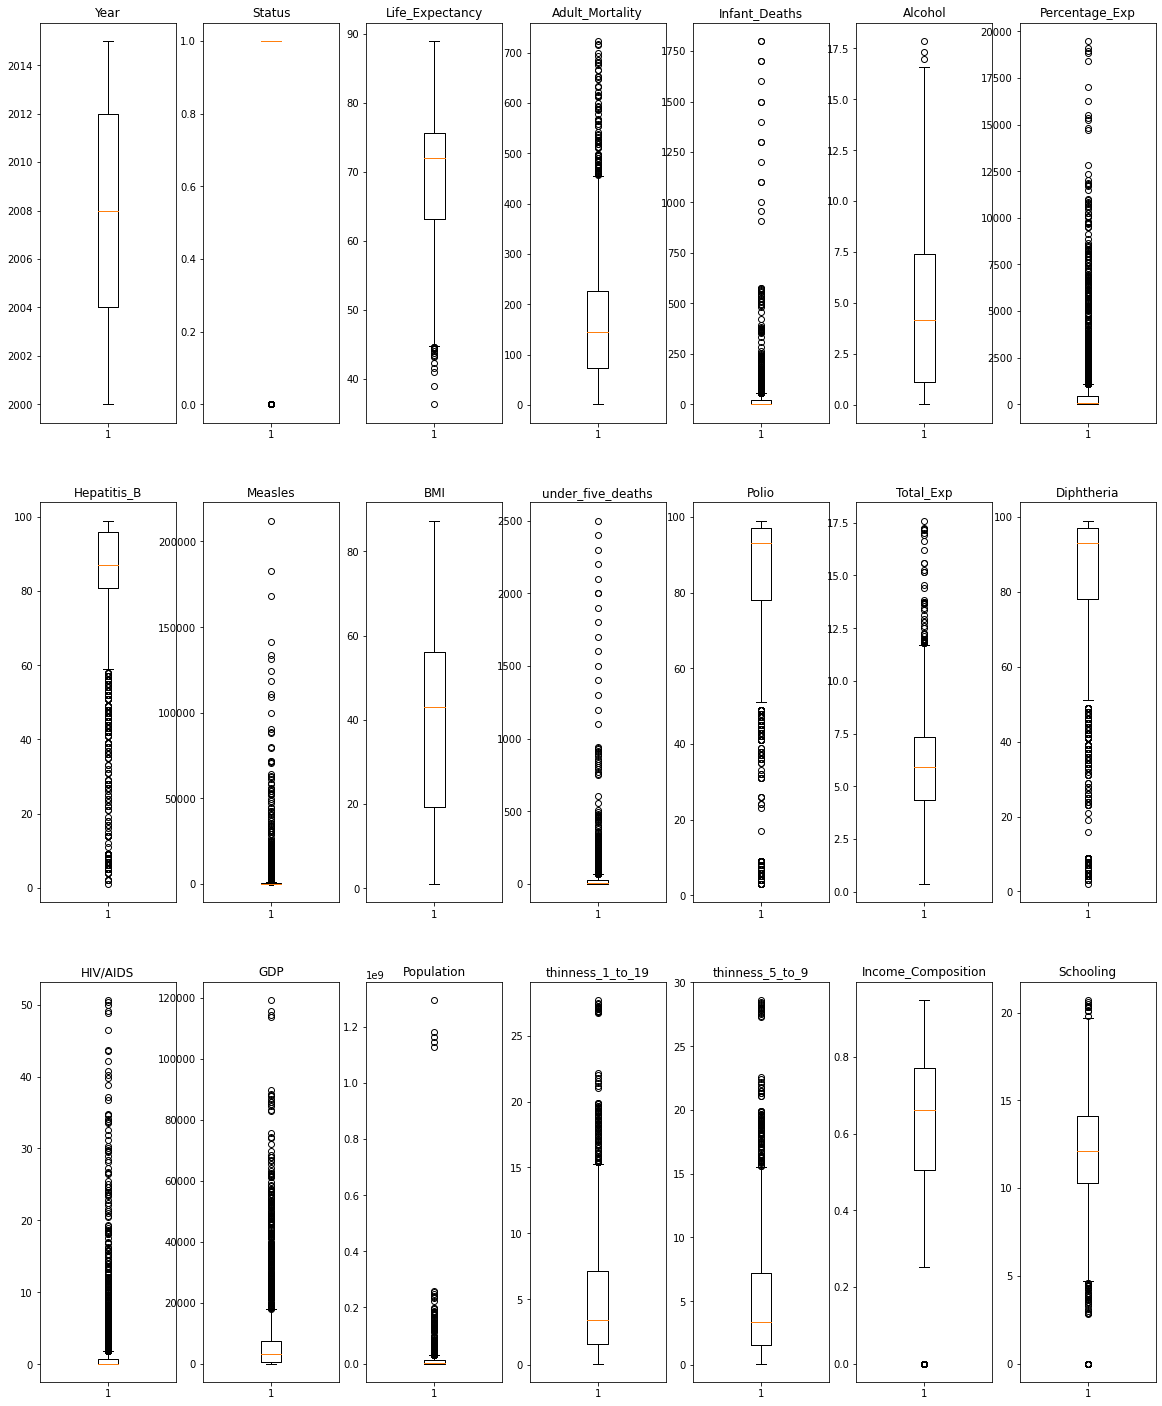

In [30]:
column_dict ={'Year':1, 'Status':2, 'Life_Expectancy':3, 'Adult_Mortality':4, 'Infant_Deaths':5,
       'Alcohol':6, 'Percentage_Exp':7, 'Hepatitis_B':8, 'Measles':9, 'BMI':10,
       'under_five_deaths':11, 'Polio':12, 'Total_Exp':13, 'Diphtheria':14, 'HIV/AIDS':15,
       'GDP':16, 'Population':17, 'thinness_1_to_19':18, 'thinness_5_to_9':19,
       'Income_Composition':20, 'Schooling':21}

plt.figure(figsize=(20,25))

for feature,i in column_dict.items():
                     plt.subplot(3,7,i) #3 cross 7 plot
                     plt.boxplot(lifexp_df[feature])
                     plt.title(feature)

plt.show()

<h2>Correlation Matrix</h2>
We develop a correlation matrix heatmap to see which of the variables are very highly correlated. Highly correlated variables causes 'Data Leakage' or Multicollinearity, which reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model.

<AxesSubplot:>

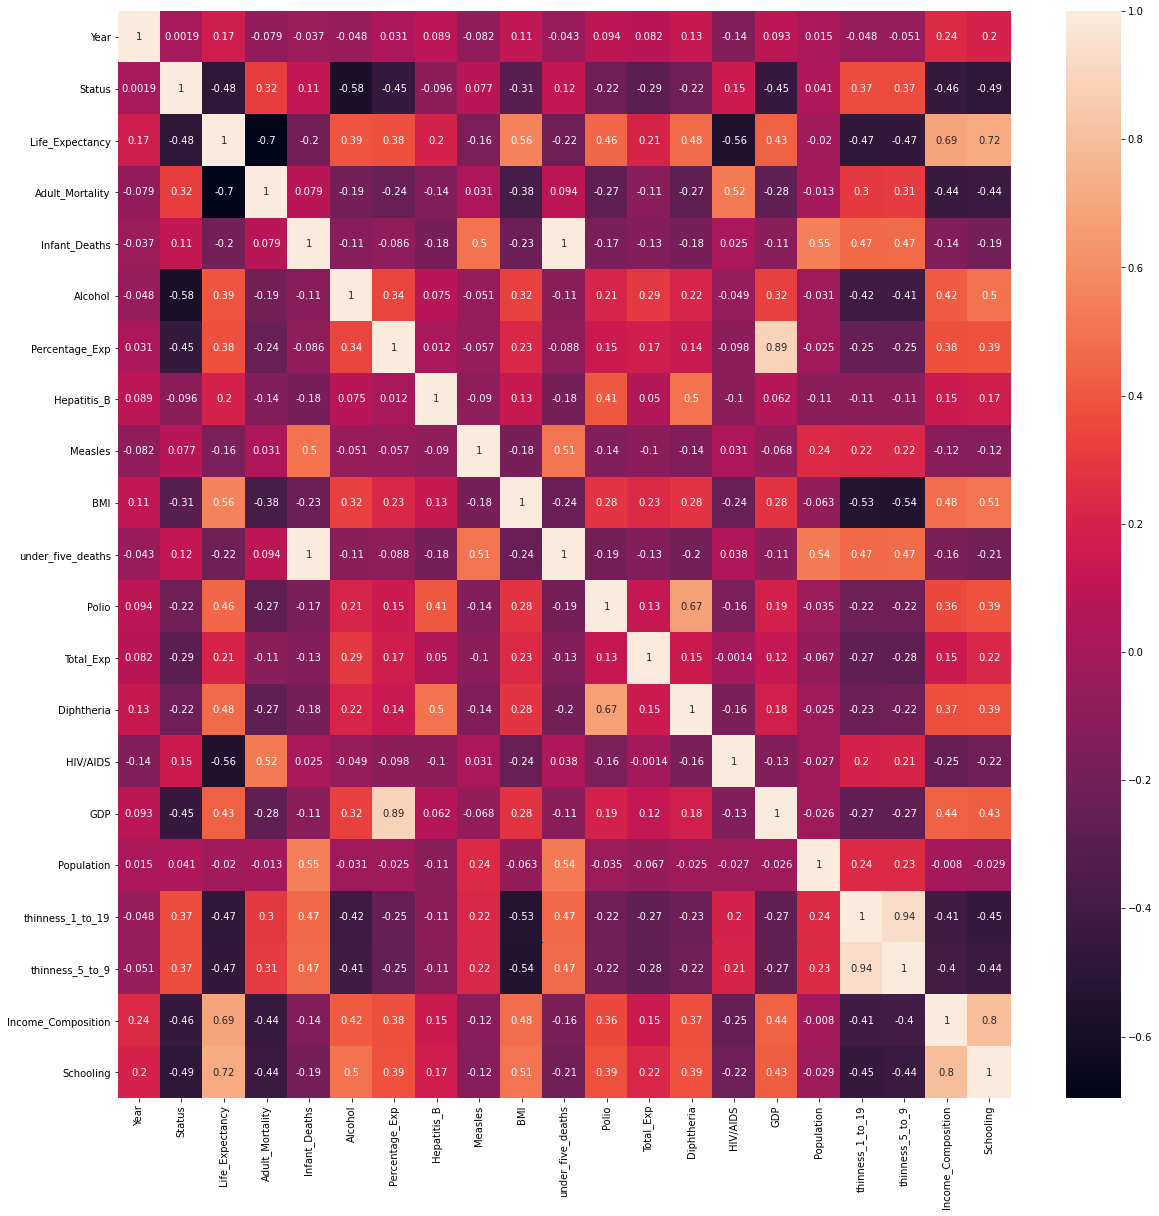

In [31]:
fig, ax = plt.subplots(figsize = (20,20)) 

corr = lifexp_df.corr() 
sb.heatmap(corr, annot = True) 

The following features are highly correlated:
1. Under 5 deaths <---> Infant Deaths
2. Thinness 5-9   <---> Thinness 1-19

We check if Life_Expectancy has a correlation of 1 with any other feature in the dataset. If yes, we need to drop that feature as it will introduce DATA LEAKAGE (intercorrelation. That one feature can be used to predict the target column)

For the sake of Project 2 however, we will not remove the above columns that are highly correlated. We will let PCA for dimensionality reduction handle this

In [32]:
#Dataset after preprocessing steps, ready to undergo scaling, train-test split and model applications
print(lifexp_df.shape)
lifexp_df.head()

(2938, 21)


,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,BMI,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# SPLIT DATASET INTO TRAIN AND TEST SETS

<h3>First separate the data into Feature set X and Target y

In [33]:
# X is the featureset. Life_Expectancy is the target y.
X = lifexp_df.drop(['Life_Expectancy'],axis =1)
y = lifexp_df['Life_Expectancy']

In [34]:
print("Feature set shape", X.shape)
print("Target column", y.shape)

Feature set shape (2938, 20)
Target column (2938,)


<h3>Split the data into Train and Test set. Default for test is 0.25. We have set it to 0.3 to explore this parameter

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#train_test_split will split the data into train and test sets. Org has the original X data before SCALING
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<h3>Scaling the dataset</h3>
We are using the MinMax Scaler for our dataset to bring all values within the range 0-1. The dataset is not sparse and has a good amount of continuous columns. However, some columns have values in thousands, some in hundreds and some 0 and 1. The featureset is comprised of different scales of continuous valued colums. As explained for the Boston Housing data which has a similar structure, we have used MinMax scaler

In [36]:
#DATA SCALING
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [37]:
#You can see now that the X_train and X_test (split featureset) have been scaled in the range of 0-1
pd.DataFrame(X_train).head()
#Similarly you can see for X_test. We have commented it here. Can uncomment and run to see the range 0-1 in test data
#pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.266667,1.0,0.308864,0.004444,0.000000,0.000257,0.813819,0.023748,0.261877,0.0048,0.677083,0.256669,0.051546,0.023762,0.000526,0.000291,0.032609,0.340351,0.475738,0.323671
1,0.866667,1.0,0.264543,0.000000,0.000000,0.010301,0.979381,0.000000,0.327926,0.0000,0.979167,0.556609,0.979381,0.001980,0.013976,0.000016,0.202899,0.189474,0.589662,0.531401
2,0.933333,1.0,0.009695,0.000000,0.265018,0.022010,0.989691,0.000000,0.651217,0.0004,0.989583,0.326615,0.989691,0.000000,0.039514,0.000245,0.039855,0.042105,0.802743,0.685990
3,0.333333,1.0,0.527701,0.051111,0.296231,0.005041,0.813819,0.001216,0.193511,0.0592,0.375000,0.221103,0.371134,0.049505,0.012460,0.016574,0.032609,0.343860,0.449367,0.328502
4,0.466667,1.0,0.131579,0.158333,0.227915,0.016051,0.927835,0.513816,0.286211,0.1328,0.947917,0.234143,0.938144,0.000000,0.023270,0.001117,0.166667,0.140351,0.695148,0.550725


<b>We can see that 70% of the data (total 2938 rows) is X_train (2056 rows) and the remaining 30% data is X_test(882 rows)

In [38]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (2056, 20)
y_train shape:  (2056,)
X_test shape:  (882, 20)
y_test shape (882,)


# PROJECT 2 BEGINS HERE

<h2>Ensemble Models, Dimensionality Reduction, Deep Learning Models

## REGRESSION TASK:
- Apply any two models with bagging and any two models with pasting. 
- Apply any two models with AdaBoost boosting. 
- Apply gradient boosting. 
- Apply PCA on data and then apply all the models in project 1 again on the post PCA data. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result from project 1, prepare a similar table for all the models after PCA and compare. Does PCA help in getting better results? 
- Apply deep learning models (MLP) covered in class. 

<h2>IMPLEMENTING ENSEMBLE MODELS

<h3> Importing required Regression libraries and other required libraries

In [39]:
#Importing evaluation score libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Importing Regression Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

<h3> 1: Apply any two models with bagging and any two models with pasting.

<h2>BAGGING</h2>

<h3>1. Bagging with Decision Tree Regressor</h3>

<b>Use GridSearch to find the best hyperparameters for Decision Tree Regressor</b>

In [40]:
from sklearn.tree import DecisionTreeRegressor

#We have considered a few of the hyperparameters here to find which could be the best
dt_param_grid = {'max_depth':range(1,10), 'min_samples_leaf':range(1,10), 'criterion':['gini','mse', 'mae'], 'splitter':['best', 'random']}

#Instantiating Decision Tree Regressor Model
dtregressor = DecisionTreeRegressor(random_state=0)
dt_best_reg = GridSearchCV(estimator = dtregressor, param_grid = dt_param_grid , return_train_score=True, n_jobs=-1)
dt_best_reg.fit(X_train, y_train)

print("Best parameters for Decision Tree: {}".format(dt_best_reg.best_params_))

Best parameters for Decision Tree: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 7, 'splitter': 'best'}


<b>Use GridSearch to find the best hyperparameters for Bagging Regressor with Dtree Naive

In [41]:
#Using Naive approach to find best params
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

n_estimators = [200,300, 400, 500]
max_samples = [0.1, 0.2, 0.3, 0.4, 0.5]
max_features = [0.1, 0.2, 0.3, 0.5]

# bagging: bootstrap = True
best_score = 0
best_estimators = 0
best_max_samples = 0
best_max_features = 0

dtregressor_bag = DecisionTreeRegressor(random_state=0, criterion = 'mse', max_depth = 9, min_samples_leaf = 7, splitter = 'best')

for est in n_estimators:
    for maxsam in max_samples:
        for maxfeat in max_features:
        #X_train_dtbag = dtregressor_bag.fit_transform(X_train)
            bagging_regressor = BaggingRegressor(dtregressor_bag, n_estimators=est, max_samples=maxsam, max_features = maxfeat, bootstrap=True, random_state=0, oob_score = True)
            bagging_regressor.fit(X_train, y_train)
            scores = cross_val_score(bagging_regressor, X_train, y_train, cv=5) # Change k-fold cv value here
            if max(scores) > best_score:
                best_score = max(scores)
                best_estimators = est
                best_max_samples = maxsam
                best_max_features = maxfeat

print(best_estimators)
print(best_max_samples)
print(best_max_features)
print(best_score)


500
0.5
0.5
0.9503756063740078


<h4>Using GridSearchCV to find the best parameters for the Bagging Regressor with DTree Regressor

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

param_grid_bag = {'n_estimators':[200,300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5],
              #'bootstrap':[True, False]
                 }

dtregressor_best = DecisionTreeRegressor(random_state=0, criterion='mse', max_depth = 9, min_samples_leaf = 7, splitter = 'best')

bag_reg = BaggingRegressor(dtregressor_best, random_state = 0)
bag_grid = GridSearchCV(bag_reg, param_grid = param_grid_bag, cv = 5, n_jobs=-1)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9,
                                                                             min_samples_leaf=7,
                                                                             random_state=0),
                                        random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [200, 300, 400, 500]})

In [43]:
bag_grid.best_params_

{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}

In [44]:
dtregressor_best = DecisionTreeRegressor(random_state=0, criterion='mse', max_depth = 9,
                                         min_samples_leaf = 7, splitter = 'best')

bag_reg_fin = BaggingRegressor(dtregressor_best, 
                           bootstrap= True,
                           max_features= 0.5,
                           max_samples= 0.5,
                           n_estimators= 500, 
                           oob_score= True, n_jobs=-1)

In [45]:
bag_reg_fin.fit(X_train, y_train)

print('Train score: %.4f'%bag_reg_fin.score(X_train, y_train))
print('Test score: %.4f'%bag_reg_fin.score(X_test, y_test))
print()
print('Best cross-validation score: %.4f'%(bag_grid.best_score_))
print()
print('Out-of-bag score: %.4f'%bag_reg_fin.oob_score_)

Train score: 0.9583
Test score: 0.9373

Best cross-validation score: 0.9385

Out-of-bag score: 0.9413


In [46]:
#Evaluation
y_pred_regbag = bag_reg_fin.predict(X_test)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_regbag)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_regbag)))

MSE: 5.5943
R2_Score:0.9373


<h3>1. Bagging with SVR KERNEL RBF</h3>

<h4>Using GridSearchCV to find the best parameters for SVR KERNEL RBF

In [47]:
from sklearn.svm import SVR

#We are considering only the two main parameters- C and gamma
param_grid_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ker_rbf = GridSearchCV(SVR(kernel = 'rbf'), param_grid_rbf, cv = 7, return_train_score=True)
grid_ker_rbf.fit(X_train,y_train)

print("Best parameters for SVR KERNEL RBF: {}".format(grid_ker_rbf.best_params_))

Best parameters for SVR KERNEL RBF: {'C': 100, 'gamma': 1}


<h4>Using GridSearchCV to find the best parameters for Bagging Regressor using SVR RBF

In [48]:
param_grid_bag = {'n_estimators':[200,300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5],
              #'bootstrap':[True, False]
                 }

svr_rbf_best = SVR(kernel = 'rbf', C=100, gamma=1)
bag_reg_svrbf = BaggingRegressor(svr_rbf_best, random_state = 0)
bag_grid_svrbf = GridSearchCV(bag_reg_svrbf, param_grid = param_grid_bag, cv = 5, n_jobs=-1)
bag_grid_svrbf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=SVR(C=100, gamma=1),
                                        random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [200, 300, 400, 500]})

In [49]:
bag_grid_svrbf.best_params_

{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}

In [50]:
svr_rbf_best = SVR(kernel = 'rbf', C=100, gamma=1)

bag_reg_svrbf_fin = BaggingRegressor(svr_rbf_best, 
                           bootstrap= True,
                           max_features=0.5 ,
                           max_samples=0.5 ,
                           n_estimators= 500, 
                           oob_score= True, n_jobs=-1)

In [51]:
bag_reg_svrbf_fin.fit(X_train, y_train)

print('Train score: %.4f'%bag_reg_svrbf_fin.score(X_train, y_train))
print('Test score: %.4f'%bag_reg_svrbf_fin.score(X_test, y_test))
print()
print('Best cross-validation score: %.4f'%(bag_grid_svrbf.best_score_))
print()
print('Out-of-bag score: %.4f'%bag_reg_svrbf_fin.oob_score_)

Train score: 0.9164
Test score: 0.9060

Best cross-validation score: 0.9023

Out-of-bag score: 0.9068


In [52]:
#Evaluation
y_pred_bag_reg_svrbf = bag_reg_svrbf_fin.predict(X_test)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_bag_reg_svrbf)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_bag_reg_svrbf)))

MSE: 8.3900
R2_Score:0.9060


<h2>PASTING</h2>

<h3>2. Pasting with Decision Tree Regressor</h3>

We have already found the best parameters for decision tree:
Best parameters for Decision Tree: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 7, 'splitter': 'best'}

<b>When we do pasting we consider the hyperparameter bootstrap=False. In this, we do sampling without replacement

<h4>Using GridSearchCV to find the best parameters for the Pasting with DTree Regressor

In [53]:
param_grid_pasting = {'n_estimators':[200,300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5],
              'bootstrap':[False]}

dtregressor_best = DecisionTreeRegressor(random_state=0, criterion='mse', max_depth = 9, min_samples_leaf = 7, splitter = 'best')

pasting_reg = BaggingRegressor(dtregressor_best, random_state = 0)
pasting_grid = GridSearchCV(pasting_reg, param_grid = param_grid_pasting, cv = 5, n_jobs=-1)
pasting_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9,
                                                                             min_samples_leaf=7,
                                                                             random_state=0),
                                        random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_features': [0.1, 0.2, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [200, 300, 400, 500]})

In [54]:
pasting_grid.best_params_

{'bootstrap': False,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 500}

In [55]:
dtregressor_best = DecisionTreeRegressor(random_state=0, criterion='mse', max_depth = 9, min_samples_leaf = 7, splitter = 'best')

pasting_reg_dtree_fin = BaggingRegressor(dtregressor_best, 
                           bootstrap= False,
                           max_features=0.5 ,
                           max_samples=0.5 ,
                           n_estimators= 500, 
                           oob_score= False, n_jobs=-1)

In [56]:
pasting_reg_dtree_fin.fit(X_train, y_train)

print('Train score: %.4f'%pasting_reg_dtree_fin.score(X_train, y_train))
print('Test score: %.4f'%pasting_reg_dtree_fin.score(X_test, y_test))
print()
print('Best cross-validation score: %.4f'%(pasting_grid.best_score_))
print()
#print('Out-of-bag score: %.4f'%pasting_reg_dtree_fin.oob_score_)
#OOB score is only available if bootstrap = True, i.e only for bagging, not for pasting

Train score: 0.9673
Test score: 0.9449

Best cross-validation score: 0.9444



In [57]:
#Evaluation
y_pred_pasting_reg_dtree = pasting_reg_dtree_fin.predict(X_test)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_pasting_reg_dtree)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_pasting_reg_dtree)))

MSE: 4.9162
R2_Score:0.9449


Text(0, 0.5, 'Train Test Scores')

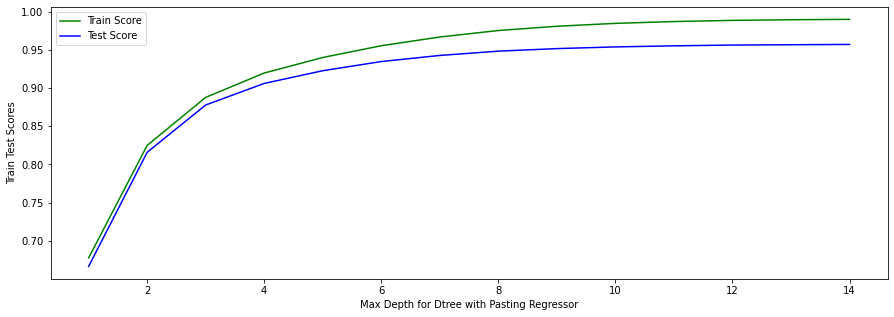

In [58]:
#Visualization
#sb.set(rc={'figure.figsize':(20,12)})
train_score_dtree_pasting = []
test_score_dtree_pasting = []

for n in range(1,15):
    dtree_reg_viz = DecisionTreeRegressor(max_depth = n, random_state=0)
    pasting_reg_dt = BaggingRegressor(dtree_reg_viz, max_samples=0.5, max_features=0.5, n_estimators=500,bootstrap=False, random_state=0)
    pasting_reg_dt.fit(X_train, y_train)
    train_score_dtree_pasting.append(pasting_reg_dt.score(X_train, y_train))
    test_score_dtree_pasting.append(pasting_reg_dt.score(X_test, y_test))

x_axis = range(1,15)
plt.subplots(figsize = (15,5))
plt.plot(x_axis, train_score_dtree_pasting, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_dtree_pasting, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth for Dtree with Pasting Regressor')
plt.ylabel('Train Test Scores')

<h3>2. Pasting with KNN Regressor</h3>

<h4>Using GridSearchCV to find the best parameters for the KNN Regressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor

param_grid_knn = {'n_neighbors':range(2,10), 'weights':['distance','uniform'],'p': [1,2]}
print("Parameter grid:\n{}".format(param_grid_knn))
knn_reg = KNeighborsRegressor()

#GridSearch
grid_search_knn = GridSearchCV(estimator=knn_reg, param_grid=param_grid_knn, return_train_score=True, cv=7)
grid_search_knn.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_knn.best_params_))

Parameter grid:
{'n_neighbors': range(2, 10), 'weights': ['distance', 'uniform'], 'p': [1, 2]}
Best parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


<h4>Using GridSearchCV to find the best parameters for Pasting using KNN Regressor

In [60]:
param_grid_pasting = {'n_estimators':[200,300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5],
             'bootstrap':[False]}

knn_best = KNeighborsRegressor(n_neighbors=4, p=1, weights='distance')
pasting_reg_knn = BaggingRegressor(knn_best, random_state = 0)
pasting_grid_knn = GridSearchCV(pasting_reg_knn, param_grid = param_grid_pasting, cv = 5, n_jobs=-1)
pasting_grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=4,
                                                                           p=1,
                                                                           weights='distance'),
                                        random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_features': [0.1, 0.2, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [200, 300, 400, 500]})

In [61]:
pasting_grid_knn.best_params_

{'bootstrap': False,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 500}

In [62]:
knn_best = KNeighborsRegressor(n_neighbors=4, p=1, weights='distance')

pasting_reg_knn_fin = BaggingRegressor(knn_best, 
                           bootstrap= False,
                           max_features=0.5 ,
                           max_samples=0.5 ,
                           n_estimators=500 , 
                           oob_score= False, n_jobs=-1)

In [63]:
pasting_reg_knn_fin.fit(X_train, y_train)

print('Train score: %.4f'%pasting_reg_knn_fin.score(X_train, y_train))
print('Test score: %.4f'%pasting_reg_knn_fin.score(X_test, y_test))
print()
print('Best cross-validation score: %.4f'%(pasting_grid_knn.best_score_))
print()
#print('Out-of-bag score: %.4f'%pasting_reg_knn_fin.oob_score_)
#OOB score is only available if bootstrap = True, i.e only for bagging, not for pasting

Train score: 0.9836
Test score: 0.9329

Best cross-validation score: 0.9254



In [64]:
#Evaluation
y_pred_pasting_reg_knn = pasting_reg_knn_fin.predict(X_test)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_pasting_reg_knn)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_pasting_reg_knn)))

MSE: 5.9836
R2_Score:0.9329


<h2>AdaBoost Boosting</h2>

<h3>3. AdaBoost Boosting with Decision Tree Regressor</h3>

We have already found the best parameters for decision tree:
Best parameters for Decision Tree: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 7, 'splitter': 'best'}

<h4>Using GridSearchCV to find the best parameters for AdaBoost Boosting using Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

#Known best hyperparameters of the Decision Tree Regressor
dtregressor_best = DecisionTreeRegressor(random_state=0, criterion='mse', max_depth = 9, min_samples_leaf = 7, splitter = 'best')

#AdaBoost Boosting Model hyperparameters
param_grid_adaboost = {'n_estimators':[200,300, 400, 500], 
              'learning_rate':[0.01, 0.05, 0.1, 0.5, 1.0, 10], 
              'loss': ['linear', 'square', 'exponential']
                'algorithm':{‘SAMME’, ‘SAMME.R’}}
adaboost_reg = AdaBoostRegressor(dtregressor_best, random_state = 0)

#GrisSearch on AdaBoost with Decision Tree to find best hyperparams
adaboost_grid_dtree = GridSearchCV(adaboost_reg, param_grid=param_grid_adaboost, cv=5,
                                   return_train_score=True, n_jobs= -1)
adaboost_grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9,
                                                                              min_samples_leaf=7,
                                                                              random_state=0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [200, 300, 400, 500]},
             return_train_score=True)

In [66]:
#Finding model best hyperparameters
adaboost_grid_dtree.best_params_

{'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 300}

In [67]:
#Known best hyperparameters of the Decision Tree Regressor
dtregressor_best = DecisionTreeRegressor(random_state=0, criterion='mse', max_depth = 9, min_samples_leaf = 7, splitter = 'best')
adaboost_reg = AdaBoostRegressor(dtregressor_best, random_state = 0)

#We found AdaBoost with Dtree best hyperparams
adaboost_reg_dtree_fin = AdaBoostRegressor(adaboost_reg, 
                           learning_rate = 0.5,
                           n_estimators=300, loss='square')

In [68]:
adaboost_reg_dtree_fin.fit(X_train, y_train)

print('Train score: %.4f'%adaboost_reg_dtree_fin.score(X_train, y_train))
print('Test score: %.4f'%adaboost_reg_dtree_fin.score(X_test, y_test))
print()
print('Best cross-validation score: %.4f'%(adaboost_grid_dtree.best_score_))

Train score: 0.9925
Test score: 0.9589

Best cross-validation score: 0.9598


In [69]:
#Evaluation
y_pred_adaboost_reg_dtree = adaboost_reg_dtree_fin.predict(X_test)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_adaboost_reg_dtree)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_adaboost_reg_dtree)))

MSE: 3.6648
R2_Score:0.9589


<h3>3. AdaBoost Boosting with KNN Regressor</h3>

Best params for KNN Regressor:
{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [70]:
from sklearn.neighbors import KNeighborsRegressor

#Known best hyperparameters for KNN Regressor
knn_best = KNeighborsRegressor(n_neighbors=4, p=1)

#AdaBoost Boosting Model hyperparameters
param_grid_adaboost = {'n_estimators':[100, 200,500], 
              'learning_rate':[0.1, 0.5, 1.0]
              #'loss': ['linear', 'square', 'exponential']
                      }
adaboost_knn = AdaBoostRegressor(knn_best, random_state = 0)

#GrisSearch on AdaBoost with KNN to find best hyperparams
adaboost_grid_knn = GridSearchCV(adaboost_knn, param_grid=param_grid_adaboost, cv=5,
                                   return_train_score=True, n_jobs= -1)
adaboost_grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=4,
                                                                            p=1),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True)

In [71]:
#Finding model best hyperparameters
adaboost_grid_knn.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [72]:
#Known best hyperparameters of KNN Regressor and Adaboost
knn_best = KNeighborsRegressor(n_neighbors=4, p=1, weights='distance')
adaboost_knn = AdaBoostRegressor(knn_best, random_state = 0)

#We found AdaBoost with KNN best hyperparams
adaboost_knn_fin = AdaBoostRegressor(KNeighborsRegressor(n_neighbors=4, p=1), 
                           learning_rate = 0.1,
                           n_estimators=100,
                            random_state=0)

In [73]:
adaboost_knn_fin.fit(X_train, y_train)

print('Train score: %.4f'%adaboost_knn_fin.score(X_train, y_train))
print('Test score: %.4f'%adaboost_knn_fin.score(X_test, y_test))

Train score: 0.9840
Test score: 0.9315


In [74]:
#Evaluation
y_pred_adaboost_knn = adaboost_knn_fin.predict(X_test)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_adaboost_knn)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_adaboost_knn)))

MSE: 6.1164
R2_Score:0.9315


In [75]:
print('Best cross-validation score: %.4f'%(adaboost_grid_dtree.best_score_))

Best cross-validation score: 0.9598


Knn with AdaBoost was taking too long to converge, hence, we have reduced few hyperparamter values

<h3>4. Gradient Boosting with Decision Tree Regressor</h3>

In [76]:
#We have already found the best parameters for decision tree: Best parameters for Decision Tree: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 7, 'splitter': 'best'}
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Known best hyperparameters of the Decision Tree Regressor
dtregressor_best = DecisionTreeRegressor(random_state=0, criterion='mse', max_depth = 9, min_samples_leaf = 7, splitter = 'best')

#Gradient Boost Boosting Model hyperparameters
param_grid_gradboost = {'n_estimators': [200,400,500], 'learning_rate': [0.05, 0.1, 0.5, 1], 'max_depth': np.arange(1, 10)}
#gradboost_dtree = GradientBoostingRegressor(dtregressor_best, random_state = 0)
gradboost_dtree = GradientBoostingRegressor(random_state=0)

gradboost_dtree_grid = GridSearchCV(gradboost_dtree, param_grid_gradboost,cv=5, return_train_score=True, n_jobs= -1)

gradboost_dtree_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5, 1],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [200, 400, 500]},
             return_train_score=True)

In [77]:
gradboost_dtree_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500}

In [78]:
#We now know best hyperparameters of Decision Tree Regressor and Gradient Boosting
#dtregressor_best = DecisionTreeRegressor(random_state=0, criterion='mse', max_depth = 9, min_samples_leaf = 7, splitter = 'best')

gradboost_dtree_fin = GradientBoostingRegressor(loss=DecisionTreeRegressor(random_state=0, criterion='mse', max_depth = 9, min_samples_leaf = 7, splitter = 'best'),
                                                learning_rate = 0.05,n_estimators=500, max_depth=6, random_state=0)

In [79]:
just_gradboost = GradientBoostingRegressor(learning_rate = 0.05,n_estimators=500, max_depth=6, random_state=0)
just_gradboost.fit(X_train, y_train)

print('Train score: %.4f'%just_gradboost.score(X_train, y_train))
print('Test score: %.4f'%just_gradboost.score(X_test, y_test))

#print('Best cross-validation score: %.4f'%(gradboost_dtree_grid.best_score_))

Train score: 0.9993
Test score: 0.9594


In [80]:
#Evaluation
y_pred_justgradboost = just_gradboost.predict(X_test)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_justgradboost)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_justgradboost)))

MSE: 3.6197
R2_Score:0.9594


<h2>PERFORMING PCA</h2>

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98, random_state= 0) #To explain 98% variance

#Transforming the train and test set
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [82]:
pca.n_components_

14

In [83]:
pca.explained_variance_ratio_.sum()

0.9843289045150122

<h3>PCA TASK</h3>
   <b>Apply PCA on data and then apply all the models in project 1 again on the post PCA data. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result from project 1, prepare a similar table for all the models after PCA and compare. Does PCA help in getting better results

<h3>MODELS AFTER PCA 

<h3>PCA with KNN Regressor</h3>

In [84]:
#Using GridSearch CV to find the best hyperparamters of the knn regression model on pca data
param_knn = {'n_neighbors':range(2,10), 'weights':['distance','uniform'],'p': [1,2]}
knn_regressor = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
knn_pca = GridSearchCV(estimator=knn_regressor, param_grid=param_knn, return_train_score=True, cv=7)
knn_pca.fit(X_train_pca, y_train)

print("Best parameters: {}".format(knn_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_pca.best_score_))

#knn regressor with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%knn_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%knn_pca.score(X_test_pca, y_test))

#Perfect train score indicates overfitting and data leakage

Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.9001
Train score: 1.0000
Test score: 0.8930


In [85]:
#Find predicted values
y_pred_knn_pca = knn_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_knn_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_knn_pca)))

MSE: 9.5458
R2_Score:0.8930


<h3>PCA with Linear Regression</h3>

In [86]:
from sklearn.linear_model import LinearRegression

#Using GridSearch CV to find the best hyperparamters of the linear regression model on pca data
param_lin = {'copy_X': [True,False], 'fit_intercept': [True,False], 'normalize': [True,False]}
lin_regressor = LinearRegression()

lin_pca = GridSearchCV(estimator=lin_regressor, param_grid=param_lin, return_train_score=True, n_jobs=None, cv=7)
lin_pca.fit(X_train_pca, y_train)

print("Best parameters: {}".format(lin_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(lin_pca.best_score_))

#linear regressor with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%lin_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%lin_pca.score(X_test_pca, y_test))

Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.8016
Train score: 0.8040
Test score: 0.7973


In [87]:
#Find predicted values
y_pred_lin_pca = lin_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_lin_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_lin_pca)))

MSE: 18.0830
R2_Score:0.7973


<h3>PCA with SGD Regression</h3>

In [88]:
#The SGD code below raises a lot of warnings. To save scroll time to find best params we have imported 'warnings' and set it to 'ignore'
import warnings
warnings.filterwarnings('ignore')

In [89]:
from sklearn.linear_model import SGDRegressor

#Using GridSearch CV to find the best hyperparamters of the SGD regression model on pca data
sgd_reg = SGDRegressor()
param_sgd = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100], 'eta0': [0.001,0.01, 0.05, 0.1, 0.5, 1, 10, 100], 'learning_rate':['constant','optimal'], 'max_iter':[10,100]}

sgd_pca = GridSearchCV(estimator=sgd_reg, param_grid=param_sgd, return_train_score=True, cv=7)
sgd_pca.fit(X_train_pca, y_train)

print("Best parameters: {}".format(sgd_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(sgd_pca.best_score_))

#SGD regressor with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%sgd_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%sgd_pca.score(X_test_pca, y_test))

Best parameters: {'alpha': 0.001, 'eta0': 0.5, 'learning_rate': 'optimal', 'max_iter': 100}
Best cross-validation score: 0.8003
Train score: 0.8031
Test score: 0.7950


In [90]:
#Find predicted values
y_pred_sgd_pca = sgd_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_sgd_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_sgd_pca)))

MSE: 18.2890
R2_Score:0.7950


<h3>PCA with Ridge Regression</h3>

In [91]:
from sklearn.linear_model import Ridge

#Using GridSearch CV to find the best hyperparamters of the Ridge regression model
ridge_reg = Ridge()
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_pca = GridSearchCV(estimator=ridge_reg, param_grid=param_ridge, return_train_score=True, cv=7)
ridge_pca.fit(X_train_pca, y_train)

print("Best parameters: {}".format(ridge_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(ridge_pca.best_score_))

#Ridge Reg with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%ridge_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%ridge_pca.score(X_test_pca, y_test))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.8016
Train score: 0.8040
Test score: 0.7973


In [92]:
#Find predicted values
y_pred_ridge_pca = ridge_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_ridge_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_ridge_pca)))

MSE: 18.0887
R2_Score:0.7973


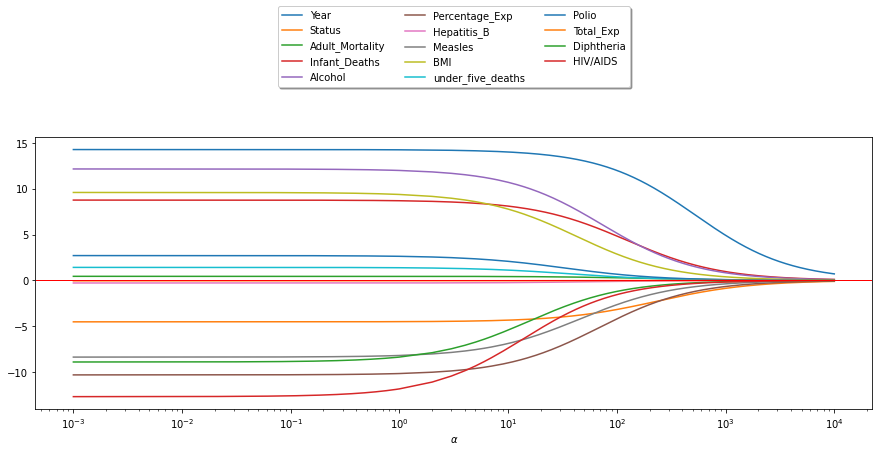

In [93]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,14):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='r')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [94]:
train_score_ridgepc = []
test_score_ridgepc = []

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,  y_train)
    train_score_ridgepc.append(ridge.score(X_train_pca, y_train))
    test_score_ridgepc.append(ridge.score(X_test_pca, y_test))

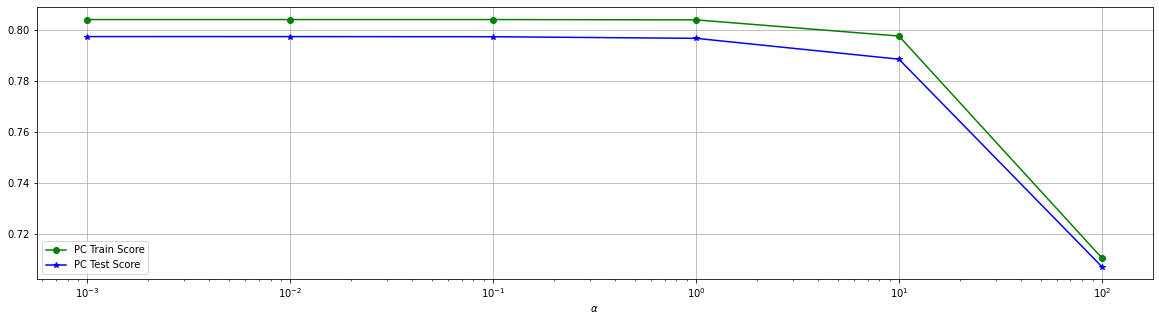

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.001, 0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_ridgepc, marker='o', c = 'g', label = 'PC Train Score')
plt.plot(x_range, test_score_ridgepc, marker='*', c = 'b', label = 'PC Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

<h3>PCA with Lasso Regression</h3>

In [96]:
from sklearn.linear_model import Lasso

#Using GridSearch CV to find the best hyperparamters of the Lasso regression model
lasso_reg = Lasso()
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso_pca = GridSearchCV(estimator=lasso_reg, param_grid=param_lasso, return_train_score=True, cv=7)
lasso_pca.fit(X_train_pca, y_train)

print("Best parameters: {}".format(lasso_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(lasso_pca.best_score_))

#Lasso Reg with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%lasso_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%lasso_pca.score(X_test_pca, y_test))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.8016
Train score: 0.8040
Test score: 0.7972


In [97]:
#Find predicted values
y_pred_lasso_pca = lasso_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_lasso_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_lasso_pca)))

MSE: 18.0962
R2_Score:0.7972


In [98]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_lassopc = []
test_score_lassopc = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    train_score_lassopc.append(lasso.score(X_train_pca,y_train))
    test_score_lassopc.append(lasso.score(X_test_pca, y_test))

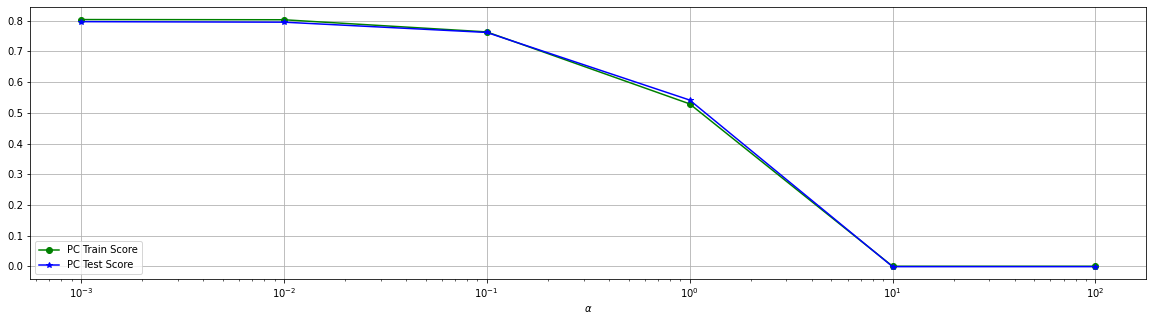

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.001, 0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_lassopc, marker='o', c = 'g', label = 'PC Train Score')
plt.plot(x_range, test_score_lassopc, marker='*', c = 'b', label = 'PC Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

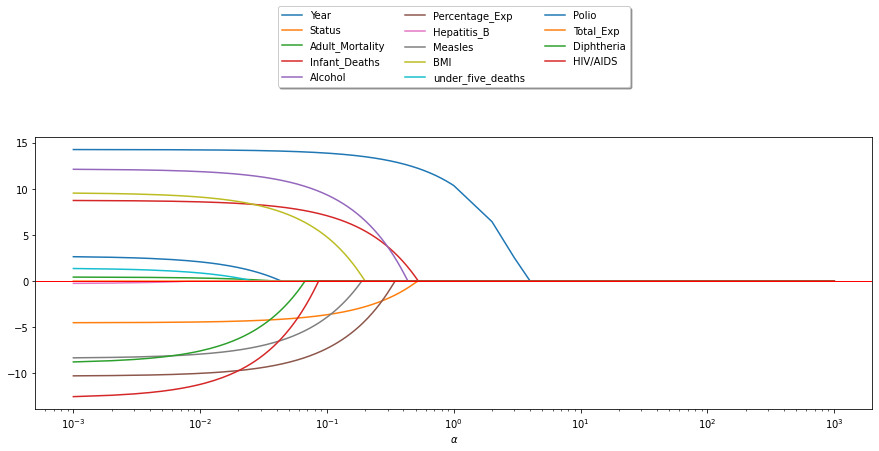

In [100]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,14):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='red')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

<h3>PCA with Polynomial Regression</h3>

In [101]:
#We have used Naive Grid Search to find the best hyperparams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 

pol_degree = [2, 3, 4] # Change degree "hyperparameter" here
pol_normalize = [True, False] # Change normalize hyperparameter here
best_score = 0
best_degree = 0

for degreeP in pol_degree:
    for normalizeP in pol_normalize:
        poly_features = PolynomialFeatures(degree = degreeP)
        X_train_poly_pca = poly_features.fit_transform(X_train_pca)
        polynomial_regressor = LinearRegression(normalize = normalizeP)
        polynomial_regressor.fit(X_train_poly_pca, y_train)
        scores = cross_val_score(polynomial_regressor, X_train_poly_pca, y_train, cv=5) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degreeP
            best_normalize = normalizeP

print(best_score)
print(best_degree)
print(best_normalize)

0.9007079894482127
2
False


In [102]:
best_poly_pca = PolynomialFeatures(degree=2)
X_train_poly_pca = best_poly_pca.fit_transform(X_train_pca)
X_test_poly_pca = best_poly_pca.transform(X_test_pca)

lreg_poly_pca = LinearRegression(copy_X= True, fit_intercept=True, normalize=False)
lreg_poly_pca.fit(X_train_poly_pca, y_train)

print('Train score: {:.4f}'.format(lreg_poly_pca.score(X_train_poly_pca, y_train)))
print('Test score: {:.4f}'.format(lreg_poly_pca.score(X_test_poly_pca, y_test)))

y_pred_poly_pca = lreg_poly_pca.predict(X_test_poly_pca)
MSE = np.square(np.subtract(y_test,y_pred_poly_pca)).mean()
print('MSE: {:.4f}'.format(MSE))
print('R2_score: {:.4f}'.format(r2_score(y_test,y_pred_poly_pca)))

Train score: 0.9107
Test score: 0.8977
MSE: 9.1313
R2_score: 0.8977


In [103]:
poly_train_score_pca = []
poly_test_score_pca = []

for n in range(1,4):
    poly_pca_viz = PolynomialFeatures(n)
    X_train_poly_pcviz = poly_pca_viz.fit_transform(X_train_pca)
    X_test_poly_pcviz = poly_pca_viz.transform(X_test_pca)
    
    lreg_poly_pcviz = LinearRegression()
    lreg_poly_pcviz.fit(X_train_poly_pcviz, y_train)
    poly_train_score_pca.append(lreg_poly_pcviz.score(X_train_poly_pcviz, y_train))
    poly_test_score_pca.append(lreg_poly_pcviz.score(X_test_poly_pcviz, y_test))

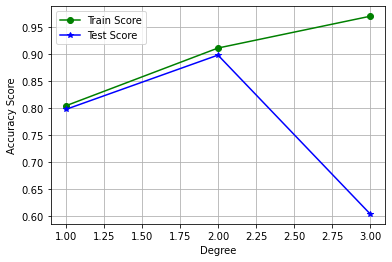

In [104]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, poly_train_score_pca, c = 'g', marker='o', label = 'Train Score')
plt.plot(x_axis, poly_test_score_pca, c = 'b', marker='*', label = 'Test Score')
plt.xlabel('Degree')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid()

<h3>PCA with Decision Tree Regressor</h3>

In [105]:
#Using GridSearch CV to find the best hyperparamters of the Dtree regression model
dtree = DecisionTreeRegressor(random_state=0)
dt_param_grid = {'max_depth':range(1,10), 'min_samples_leaf':range(1,10), 'criterion':['gini','mse', 'mae'], 'splitter':['best', 'random']}

dt_pca = GridSearchCV(estimator = dtree, param_grid = dt_param_grid , cv=7, return_train_score=True, n_jobs=-1)
dt_pca.fit(X_train_pca, y_train)

print("Best parameters for Decision Tree: {}".format(dt_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(dt_pca.best_score_))

#Dtree Reg with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%dt_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%dt_pca.score(X_test_pca, y_test))

Best parameters for Decision Tree: {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 7, 'splitter': 'best'}
Best cross-validation score: 0.8023
Train score: 0.9204
Test score: 0.7992


In [106]:
#Find predicted values
y_pred_dtree_pca = dt_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_dtree_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_dtree_pca)))

MSE: 17.9178
R2_Score:0.7992


<h3>PCA with Support Vector Machine</h3>

<b>Linear SVR with PCA

In [107]:
from sklearn.svm import LinearSVR

param_linsvr_pca = {'max_iter':range(1,100), 'C':[0.001, 0.01, 0.1, 1, 10, 100]}

linsvr_pca=GridSearchCV(estimator=LinearSVR(), param_grid=param_linsvr_pca, cv=7, return_train_score=True, n_jobs=-1)
linsvr_pca.fit(X_train_pca, y_train)

print("Best parameters: {}".format(linsvr_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(linsvr_pca.best_score_))

#LinearSVR with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%linsvr_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%linsvr_pca.score(X_test_pca, y_test))

Best parameters: {'C': 1, 'max_iter': 14}
Best cross-validation score: 0.7903
Train score: 0.7918
Test score: 0.7886


In [108]:
#Find predicted values
y_pred_dtree_pca = dt_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_dtree_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_dtree_pca)))

MSE: 17.9178
R2_Score:0.7992


<b> SVR kernel Linear with PCA

In [109]:
from sklearn.svm import SVR

#We are considering only the two main parameters- C and gamma
param_kerlinsvr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
kerlinsvr_pca = GridSearchCV(SVR(kernel = 'linear'), param_grid=param_kerlinsvr, cv = 7, return_train_score=True)
kerlinsvr_pca.fit(X_train_pca,y_train)

print("Best parameters: {}".format(kerlinsvr_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(kerlinsvr_pca.best_score_))

#Kernel Linear SVR with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%kerlinsvr_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%kerlinsvr_pca.score(X_test_pca, y_test))

Best parameters: {'C': 10, 'gamma': 0.001}
Best cross-validation score: 0.7895
Train score: 0.7936
Test score: 0.7920


In [110]:
#Find predicted values
y_pred_kerlinsvr_pca = kerlinsvr_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_kerlinsvr_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_kerlinsvr_pca)))

MSE: 18.5634
R2_Score:0.7920


<b> SVR kernel RBF with PCA

In [111]:
#We are considering only the two main parameters- C and gamma
param_kerrbfsvr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
kerrbfsvr_pca = GridSearchCV(SVR(kernel = 'rbf'), param_grid=param_kerrbfsvr, cv = 7, return_train_score=True)
kerrbfsvr_pca.fit(X_train_pca,y_train)

print("Best parameters: {}".format(kerrbfsvr_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(kerrbfsvr_pca.best_score_))

#Kernel SVR RBF with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%kerrbfsvr_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%kerrbfsvr_pca.score(X_test_pca, y_test))

Best parameters: {'C': 100, 'gamma': 1}
Best cross-validation score: 0.9203
Train score: 0.9585
Test score: 0.9141


In [112]:
#Find predicted values
y_pred_kerrbfsvr_pca = kerrbfsvr_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_kerrbfsvr_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_kerrbfsvr_pca)))

MSE: 7.6626
R2_Score:0.9141


<b>SVR kernel poly with PCA

In [113]:
#Reducing the hyperparam values as the model did not converge in the last project and took >6hours
param_kerpolysvr = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1]}

kerpolysvr_pca = GridSearchCV(SVR(kernel = 'poly'), param_grid=param_kerpolysvr, cv = 7, return_train_score=True, n_jobs=-1)
kerpolysvr_pca.fit(X_train_pca,y_train)

print("Best parameters: {}".format(kerpolysvr_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(kerpolysvr_pca.best_score_))

#Kernel SVR poly with the best hyperparams fit to the pc data generates the following train and test scores
print('Train score: %.4f'%kerpolysvr_pca.score(X_train_pca, y_train))
print('Test score: %.4f'%kerpolysvr_pca.score(X_test_pca, y_test))

Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation score: 0.7653
Train score: 0.8259
Test score: 0.7762


In [114]:
#Find predicted values
y_pred_kerpolysvr_pca = kerpolysvr_pca.predict(X_test_pca)

print('MSE: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred_kerpolysvr_pca)))
print('R2_Score:{:.4f}'.format(r2_score(y_test, y_pred_kerpolysvr_pca)))

MSE: 19.9717
R2_Score:0.7762


<h3>COMPARING PERFORMANCE AND EVALUATION FOR PROJECT 1 AND 2

<b>Comparing train and test scores

In [115]:
befaft = ['Before PCA','Before PCA','After PCA','After PCA']
score = ['Training before','Test before','Training after','Test after']
cols = list(zip(befaft,score))
cols = pd.MultiIndex.from_tuples(cols)

score_data =np.array([(1.0000,0.9316, 1.0000, 0.8930),(0.8099, 0.8084, 0.8040, 0.7973),
                      (0.8064, 0.8029,0.8001, 0.7928),(0.8087, 0.8044, 0.8040, 0.7973),
                      (0.8099, 0.8084, 0.8040, 0.7972),(0.9256, 0.8931, 0.9107, 0.8977),
                      (0.9692, 0.9150, 0.9204, 0.7992),(0.7930, 0.7897, 0.7934, 0.7916),
                      (0.8006, 0.7989, 0.7936, 0.7920),(0.9636, 0.9205, 0.9585, 0.9141),
                      ('not done', 'not done', 0.8259, 0.7762)])
    
df_table = pd.DataFrame(score_data, index=['KNN','Linear','SGD Regressor', 'Ridge','Lasso','Polynomial', 'Decision Tree','LinearSVR','SVR kernel-Linear','SVR kernel-rbf','SVR kernel-poly'], columns=cols)
print(df_table)

                       Before PCA                  After PCA           
                  Training before Test before Training after Test after
KNN                           1.0      0.9316            1.0      0.893
Linear                     0.8099      0.8084          0.804     0.7973
SGD Regressor              0.8064      0.8029         0.8001     0.7928
Ridge                      0.8087      0.8044          0.804     0.7973
Lasso                      0.8099      0.8084          0.804     0.7972
Polynomial                 0.9256      0.8931         0.9107     0.8977
Decision Tree              0.9692       0.915         0.9204     0.7992
LinearSVR                   0.793      0.7897         0.7934     0.7916
SVR kernel-Linear          0.8006      0.7989         0.7936      0.792
SVR kernel-rbf             0.9636      0.9205         0.9585     0.9141
SVR kernel-poly          not done    not done         0.8259     0.7762


<b>We can see that after performing PCA and then running Regression Models on the PC data (reduced featureset), the train and test scores drop as compared to the train and test score before performing PCA.
The model that has the highest accuracy after PCA is SVR kernel rbf (same as that in project 1)

# NEURAL NETWORKS

<b>Apply deep learning models (MLP) covered in class.

In [127]:
lifexp_df.shape

(2938, 22)

In [ ]:
#Featureset and target for NN
X = lifexp_df.drop(['Life_Expectancy'],axis =1)
y = lifexp_df['Life_Expectancy']

print(X.shape)
print(y.shape)

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X ,y, random_state = 0, test_size=0.3)

scaler = MinMaxScaler()
NN_X_train = scaler.fit_transform(X_train_org)
NN_X_test = scaler.transform(X_test_org)

In [131]:
print(NN_X_train.shape)
print(NN_X_test.shape)

(2056, 20)
(882, 20)


In [132]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense,Activation
from keras.layers import Flatten
from keras.wrappers.scikit_learn import KerasRegressor   
from keras.optimizers import SGD

<h2>PERCEPTRON

In [133]:
def create_model():
    # create model
    model = Sequential()
    # input layer: # number AN, input_dim (input_shape), activation:sigmoid/relu
    model.add(Dense(20, input_dim=20, kernel_initializer= 'normal', activation='relu', name = 'input_layer'))
    # hidden layer
    model.add(Dense(8, activation='relu', kernel_initializer= 'normal', name = 'hidden_layer_1'))
    # output layer
    model.add(Dense(1, kernel_initializer= 'normal', name = 'output_layer'))
    
    model.compile(loss='mean_squared_error', optimizer= 'sgd', metrics=['mse'])
    return model

<b>GridSearch to find best params
   

In [134]:
model = KerasRegressor(build_fn = create_model, verbose = 0)

param_perceptron = {'batch_size':[20,40,60,80,100,120] , 'epochs':[10, 50, 100]}
grid_nn = GridSearchCV(estimator= model, param_grid = param_perceptron, cv = 5, n_jobs = -1)

grid_nn.fit(NN_X_train, y_train)
print("Best parameters: {}".format(grid_nn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_nn.best_score_))

Best parameters: {'batch_size': 60, 'epochs': 100}
Best cross-validation score: -78.64


In [135]:
#Step 1: build the model
model_fin = Sequential()
#input layer
model_fin.add(Dense(20, input_dim = 20, kernel_initializer= 'normal', activation = 'relu'))
#hidden layer
model_fin.add(Dense(8, activation = 'relu', kernel_initializer= 'normal'))
#output layer
model_fin.add(Dense(1, kernel_initializer= 'normal'))

In [136]:
#Step 2: Compile
model_fin.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

In [137]:
#Step 3: Train
model_fin.fit(NN_X_train, y_train, epochs = 100 , batch_size =80)

Epoch 1/100
26/26 [==============================] - 0s 614us/step - loss: 86059.9453 - mse: 86059.9453
Epoch 2/100
26/26 [==============================] - 0s 614us/step - loss: 2454.1638 - mse: 2454.1638
Epoch 3/100
26/26 [==============================] - 0s 614us/step - loss: 917.2200 - mse: 917.2200
Epoch 4/100
26/26 [==============================] - 0s 614us/step - loss: 379.5194 - mse: 379.5194
Epoch 5/100
26/26 [==============================] - 0s 769us/step - loss: 191.6759 - mse: 191.6759
Epoch 6/100
26/26 [==============================] - 0s 614us/step - loss: 126.0062 - mse: 126.0062
Epoch 7/100
26/26 [==============================] - 0s 499us/step - loss: 102.9345 - mse: 102.9345
Epoch 8/100
26/26 [==============================] - 0s 575us/step - loss: 94.9517 - mse: 94.9517
Epoch 9/100
26/26 [==============================] - 0s 806us/step - loss: 92.2498 - mse: 92.2498
Epoch 10/100
26/26 [==============================] - 0s 652us/step - loss: 91.3226 - mse: 91.3226

In [138]:
# step 4: evaluate the model
model_fin.evaluate(NN_X_train, y_train)

65/65 [==============================] - 0s 454us/step - loss: 90.8178 - mse: 90.8178


[90.81780242919922, 90.81780242919922]

In [139]:
model_fin.evaluate(NN_X_test, y_test)

28/28 [==============================] - 0s 535us/step - loss: 89.3647 - mse: 89.3647


[89.36471557617188, 89.36471557617188]

In [140]:
y_NNtrain_predict = model_fin.predict(NN_X_train)
y_NNtest_predict = model_fin.predict(NN_X_test)

print('Train score: {:.4f}'.format(y_NNtrain_predict.score(NN_X_train, y_train)))

print('Train score: {:.4f}'.format(r2_score(y_train, y_NNtrain_predict)))
print('Test score: {:.4f}'.format(r2_score(y_test, y_NNtest_predict)))

AttributeError: 'numpy.ndarray' object has no attribute 'score'